
# Trabajo semanal N°10: Síntesis de funciones disipativas

### Autor Gonzalo Goumaz



## Ejercicio 1

### Consigna

Encuentre el valor de los componentes del siguiente circuito

<figure>
<center>
<img src="Images/punto1.jpg">
<figcaption> Fig 1.1: Red circuital ejercicio 1.</figcaption>
</figure>
    
Sabiendo que está caracterizado por la siguiente función de excitación y constantes de tiempo:

\begin{equation}
    R1.C1= \frac{1}{6}
\end{equation}
    
\begin{equation}
    R2.C2= \frac{2}{7}
\end{equation}
    
\begin{equation}
    Z(s) = \frac{(s^2+6s+8)}{(s^2+4s+3)}
\end{equation}



### Resolución analítica

En el PDF adjunto se encuentra la resolución análitica de lo solicitado para el punto 1

In [1]:
from IPython.display import IFrame
IFrame("./TS10_ej1.pdf", width = 900, height = 900)


### Resolución simbólica 

A continuación, se desarrolla el punto 1 por medio de herramientas de simulación simbólica en Python.

In [2]:
# ---- Modulos y funciones necesarias ---- #

import sympy as sp
from pytc2.dibujar import (display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo, 
                           dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_tanque_RC_derivacion,
                           dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC) 
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.remociones import remover_valor_en_infinito, remover_polo_sigma


# ---------------------------------------- #

s = sp.symbols('s', complex=True) # Defino la variable compleja S

# ---------------------------------------- #

Realizo una remoción parcial del valor en infinito con la finalidad de ajustar un cero en sigma =-6
Como resultado de esta remoción, se tiene que


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Invierto a ZA para poder remover el polo que supone el tanque R1C1 en derivacion
Resulta entonces que 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Invierto a YB y remuevo un valor en infinito para fijar un cero en -7/2
De esta remocion resulta


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Invierto a ZC para poder remover el polo que supone el tanque R2C2 en derivacion y quedarme con Z3
Resulta entonces que 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

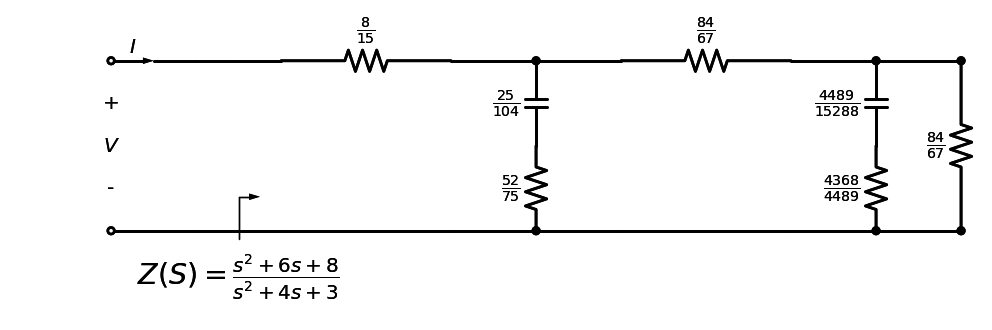

In [3]:
# ------------- Ejercicio 1 -------------- #

sigma1 = sp.nsimplify(-6)
sigma2 = sp.nsimplify(-7/2)

Z = sp.nsimplify((s**2 + 6*s + 8)/(s**2 + 4*s + 3))

print(f"Realizo una remoción parcial del valor en infinito con la finalidad de ajustar un cero en sigma ={sigma1}")

ZA, Z1 = remover_valor_en_infinito(Z, sigma_zero=sigma1)

print("Como resultado de esta remoción, se tiene que")
print_latex(a_equal_b_latex_s('Z1', Z1))
print_latex(a_equal_b_latex_s('ZA', ZA))

print("Invierto a ZA para poder remover el polo que supone el tanque R1C1 en derivacion")

YB, kk1, R1 , C1 = remover_polo_sigma(imm= 1/ZA, sigma=sigma1 , isImpedance=False)

print("Resulta entonces que ")
print_latex(a_equal_b_latex_s("R1", R1))
print_latex(a_equal_b_latex_s("C1", C1))
print_latex(a_equal_b_latex_s("YB", YB))

print("Invierto a YB y remuevo un valor en infinito para fijar un cero en -7/2")

ZC, Z2 = remover_valor_en_infinito(1/YB, sigma_zero=sigma2)

print("De esta remocion resulta")
print_latex(a_equal_b_latex_s('Z2', Z2))
print_latex(a_equal_b_latex_s('ZC', ZC))

print("Invierto a ZC para poder remover el polo que supone el tanque R2C2 en derivacion y quedarme con Z3")

Y3, kk2, R2, C2 = remover_polo_sigma(imm=1/ZC, sigma=sigma2, isImpedance=False)

Z3 = 1/Y3

print("Resulta entonces que ")
print_latex(a_equal_b_latex_s("R2", R2))
print_latex(a_equal_b_latex_s("C2", C2))
print_latex(a_equal_b_latex_s("Z3", Z3))

## Con todo esto se procede a dibujar el circuito resultante

d = dibujar_puerto_entrada('', voltage_lbl=('+', '$V$', '-'), current_lbl= '$I$')
d, zz_lbl = dibujar_funcion_exc_abajo(d, 'Z(S)', Z, hacia_salida=True, k_gap_width=0.5)
d = dibujar_elemento_serie(d, Resistor, Z1)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_derivacion(d, sym_R_label=R1, capacitor_lbl=C1)
d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_serie(d, Resistor, Z3)
d = dibujar_espacio_derivacion(d)
d = dibujar_tanque_RC_derivacion(d, sym_R_label=R2, capacitor_lbl=C2)
d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, Z3)

display(d)


Se observa que los valores de los componentes obtenidos son coincidentes con los resultados del método analítico.


## Punto 2

### Consigna

Determine el valor de los componentes que integran el siguiente dipolo, sabiendo que satisface la impedancia propuesta:

\begin{equation}
    Z(s) = \frac{(s^2+s+1)}{(s^2+2s+5)(s+1)}
\end{equation}

<figure>
<center>
<img src="Images/punto2.jpg">
<figcaption> Fig 2.1: Red circuital ejercicio 2.</figcaption>
</figure>
    


### Resolución analítica

En el PDF a continuación puede verse la resolución de este punto.

In [4]:
from IPython.display import IFrame
IFrame("./TS10_ej2.pdf", width = 900, height = 900)


### Resolución simbólica

Se verifican los resultados del punto 2 utilizando herramientas de simulación simbólica en Python.

In [5]:
import pytc2.cuadripolos as tc2

# ------------- Ejercicio 2 -------------- #

# Defino los símbolos necesarios

C1 = sp.nsimplify(1)
C2 = sp.nsimplify(64/13)
R1 = sp.nsimplify(1/2)
R2 = sp.nsimplify(1/16)
R3 = sp.nsimplify(13/48)
L1 = sp.nsimplify(1/4)

# Armo la MAI

# 0----------L1--R2---------------1 #
#     -   -           -   -         #
#     C1  R1          C2  R3        #
#     -   -           -   -         #
# 2-------------------------------2 #

Ymai = sp.Matrix([
        [s*C1 + 1/R1 + 1/(s*L1 + R2), -1/(s*L1 + R2), -(s*C1 + 1/R1)],
        [-1/(s*L1 + R2), 1/(s*L1 + R2) + s*C2 + 1/R3, -(s*C2 + 1/R3)],
        [-(s*C1 + 1/R1), -(s*C2 + 1/R3), s*C1 + 1/R1 + s*C2 + 1/R3]
        
    ])

print("Impedancia de entrada:")
Zin = tc2.calc_MAI_impedance_ij(Ymai, 0, 2, verbose=False)
print_latex('Z_{in}(S)' +'='+ sp.latex(Zin))

# ---------------------------------------- #

Impedancia de entrada:


<IPython.core.display.Math object>

La impedancia de entrada calculada mediante la MAI es coincidente con la impuesta en la consigna, con lo cual se verifica que los valores de los componentes hallados son correctos.